In [329]:
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns

## Elucidean Distance

In [330]:
points = [[3,2] , [2,4]]

In [331]:
# Basic Formula
print("Elucidean Distance = ",(sqrt( (points[0][0]-points[0][1])**2 + (points[1][0]-points[1][1])**2) ) )

Elucidean Distance =  2.23606797749979


In [332]:
#Using Numpy
a = np.array([[3,2]])
b = np.array([[2,4]])
print("Elucidean Distance = ",(sqrt(np.sum((a-b)**2))))

Elucidean Distance =  2.23606797749979


In [333]:
# Using Linear Alzebra, more simplified, fast and efficient.
print("Elucidean Distance = ",np.linalg.norm(a-b))

Elucidean Distance =  2.23606797749979


In [334]:
import matplotlib.pyplot as plot 
from collections import Counter

#### Taking a sample data

In [335]:
# Taking some data with 2 groups
dataset = {'r':[[1,2],[2,3],[3,3],[4,1],[2,5]] , 'g':[[6,5],[7,7],[8,6],[9,5],[5,7]]}
# Taking data to predict
pre = [4.3,4]

## Plotting the Dataset

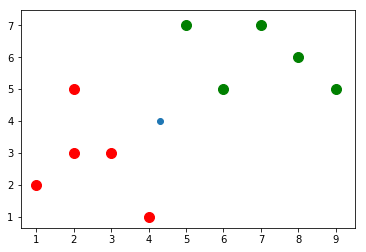

In [336]:
[[plot.scatter(j[0],j[1],s= 100,color= i) for j in dataset[i]] for i in dataset]
# ploting new_feature
plot.scatter(pre[0],pre[1])

## Algorithm

In [337]:
# K for k-nearestneighbors
# value of K should be greater than the length i.e. the number of groups obtained 

In [338]:
# Function takes a dictionary (group name with all points) and a list ( With points, to predict group that it belongs) 
def k_neighbors(data,pre,k=3):
    # empty list 
    dis = []
    for i in data:
        for j in data[i]:
            # calculating distance for every point in each group with every point to be predicted
            Elucidean_dist  = np.linalg.norm(np.array(j)-np.array(pre))
            
            # to store all the Elucidean distances along with their group 
            dis.append([Elucidean_dist,i])
            
    # Taking the first k smallest distances
    votes = [v[1] for v in sorted(dis)[:k]]

    # returning the group with most votes and confidence
    return ((Counter(votes).most_common()[0][0]),(Counter(votes).most_common()[0][1] / k))

In [339]:
# Applying the algorithm to the above data set
print(k_neighbors(dataset,pre))

('r', 0.6666666666666666)


In [340]:
lis = [3,3,2,3,2,3,3,2]
Counter(lis).most_common()[0][1]/3

1.6666666666666667

# Predicting Heart Diseases

In [341]:
# This data is taken from kaggle
# Reading data
df = pd.read_csv('heart.csv')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [343]:
df.shape

(303, 14)

In [344]:
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


## Visualization

#### Age

C:\Users\koush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


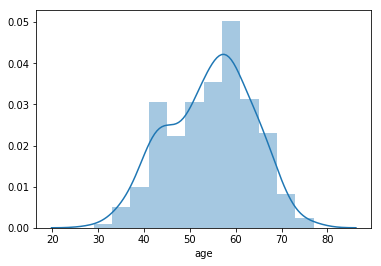

In [345]:
sns.distplot(a=df['age'])

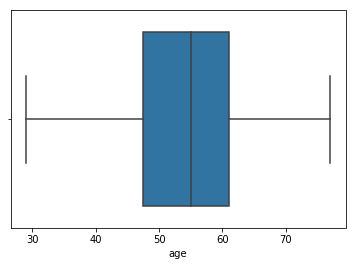

In [346]:
sns.boxplot(data=df,x='age')

#### Sex

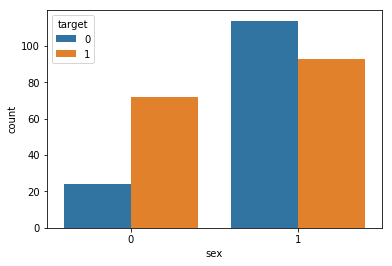

In [347]:
sns.countplot(data=df,x='sex',hue='target')

In [348]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

#### Chest Pain 

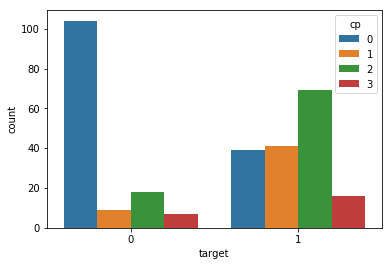

In [349]:
sns.countplot(data=df,x='target',hue='cp')

#### Trestbps

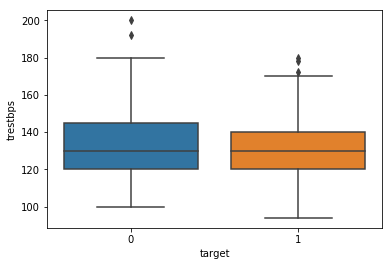

In [350]:
sns.boxplot(data=df,y='trestbps',x='target')

#### cholestoral

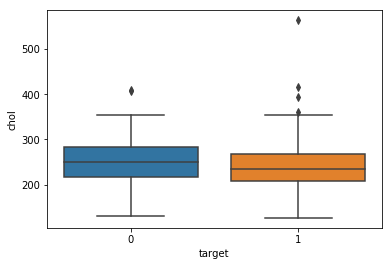

In [351]:
sns.boxplot(data=df,y='chol',x='target')

#### FBS

Text(0.5, 1.0, 'FBS vs Target')

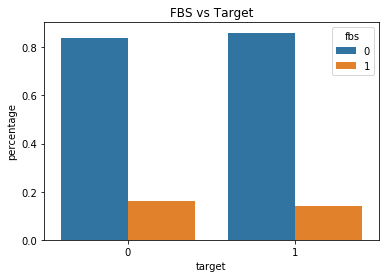

In [352]:
temp = (df.groupby(['target']))['fbs'].value_counts(normalize=True).reset_index(name='percentage')
sns.barplot(x = "target", y = "percentage", hue = "fbs", data = temp).set_title("FBS vs Target")

#### restecg

Text(0.5, 1.0, 'RestEcg vs Target')

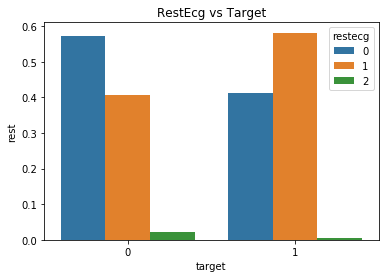

In [353]:
temp = (df.groupby(['target']))['restecg'].value_counts(normalize=True).reset_index(name='rest')
sns.barplot(x = "target", y = "rest", hue = "restecg", data = temp).set_title("RestEcg vs Target")

#### thal

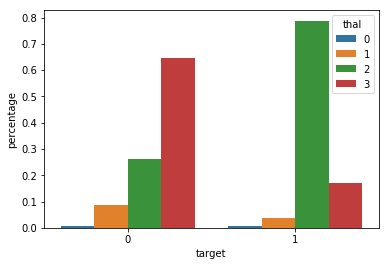

In [354]:
temp = (df.groupby(['target']))['thal'].value_counts(normalize=True).reset_index(name='percentage')
sns.barplot(x = "target", y = "percentage", hue = "thal", data = temp)

#### exang

Text(0.5, 1.0, 'exang vs Target')

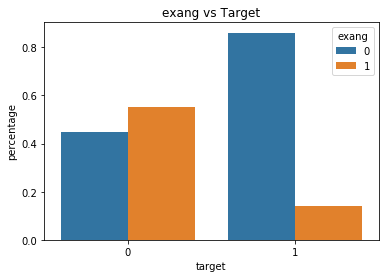

In [355]:
temp = (df.groupby(['target']))['exang'].value_counts(normalize=True).reset_index(name='percentage')
sns.barplot(x = "target", y = "percentage", hue = "exang", data = temp).set_title("exang vs Target")

#### oldpeak

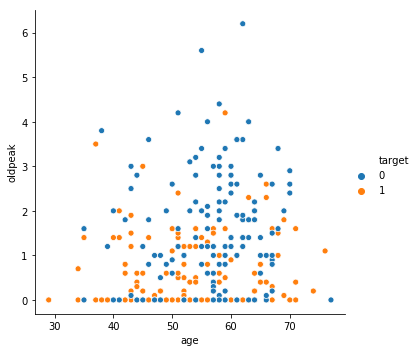

In [356]:
sns.relplot(data = df,y='oldpeak',x='age',hue='target')

#### Slope

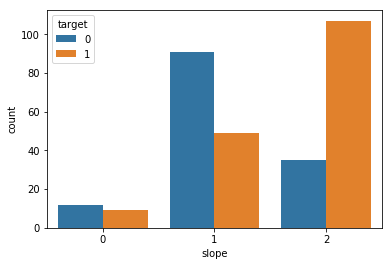

In [357]:
sns.countplot(data=df,x='slope',hue='target')

#### ca

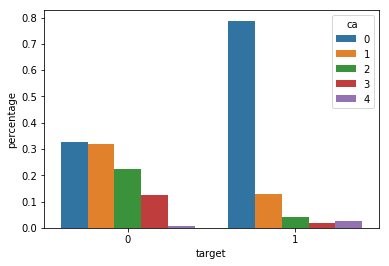

In [358]:
temp = (df.groupby(['target']))['ca'].value_counts(normalize=True).reset_index(name='percentage')
sns.barplot(x = "target", y = "percentage", hue = "ca", data = temp)

#### thalach

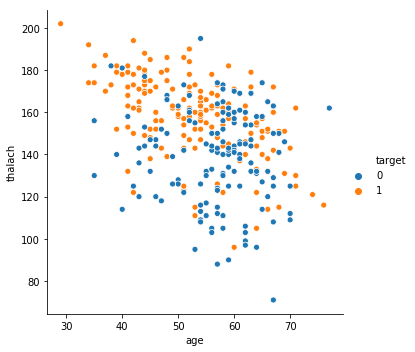

In [359]:
sns.relplot(data = df,y='thalach',x='age',hue='target')

In [360]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

## Feature Engineering

In [361]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [362]:
heart = df.copy()

In [363]:
df.drop(['fbs','trestbps'], axis= 1, inplace=True)

In [364]:
df.head()

,age,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,233,0,150,0,2.3,0,0,1,1
1,37,1,2,250,1,187,0,3.5,0,0,2,1
2,41,0,1,204,0,172,0,1.4,2,0,2,1
3,56,1,1,236,1,178,0,0.8,2,0,2,1
4,57,0,0,354,1,163,1,0.6,2,0,2,1


In [365]:
df.shape

(303, 12)

## Dividing the dataset

In [366]:
#converting the data into a list of float values
dataset = df.astype(float).values.tolist()

In [367]:
(len(dataset),len(dataset[0]))

(303, 12)

In [368]:
from random import shuffle as rans

In [369]:
#shuffling the list of lists
rans(dataset)

In [370]:
# creating dictionaries for train and test data
train_dic = {0:[],1:[]}
test_dic = {0:[],1:[]}

In [371]:
# dividing the data into 75% and 25%
train_data = dataset[:-int(0.20*len(dataset))]
test_data = dataset[-int(0.20*len(dataset)):]

In [372]:
(len(train_data),len(test_data))

(243, 60)

In [373]:
# filling dictionaries
for i in train_data:
    train_dic[i[-1]].append(i[:-1])
for j in test_data:
    test_dic[j[-1]].append(j[:-1])

In [374]:
# For Validation
Accuracy = []
Confidence = []
correct = 0
total = 0

## Applying Algorithm and Calculating Accuracy

In [375]:
for i in range(30):
    for group in test_dic:
        for data in test_dic[group]:
            vote,confidence = k_neighbors(train_dic, data, 3)
            if group == vote:
                correct += 1
            else:
                Confidence.append(confidence)
            total += 1
    Accuracy.append(correct/total)

In [376]:
print("Accuracy : ",sum(Accuracy)/len(Accuracy))
print("Confidence : ",sum(Confidence)/len(Confidence))

Accuracy :  0.6666666666666666
Confidence :  0.766666666666671


## Using Sklearn

In [377]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [378]:
y = df['target']
X = df.drop('target', axis = 1)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [380]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6885245901639344

#### Both the Classifiers yeild similar results, Acuraccy ranging from 0.80 to 0.60.